### 1. **Análisis de Series Temporales**
**Resumen:** El análisis de series temporales permite identificar patrones, tendencias y estacionalidades en los precios y volúmenes de ventas de aguacates a lo largo del tiempo.


In [40]:
import numpy as np
import pandas as pd

import utils.MAGic_Avocado_utils as magic

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

import seaborn as sns

#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
# Carga el dataset
df_orig = pd.read_csv("./dataset/avocado.csv")
df_orig

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [42]:
# Copia del dataframe para preservar datos originales
df = df_orig.copy()

#### 1. **Descomposición de Series Temporales de Precios:**

   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.


In [43]:
# Añade columna con categorización de City/Region/GreaterRegion/TotalUS
df['cat_region'] = df['region'].transform(lambda x: magic.get_truly_region(x))
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,cat_region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Region
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Region
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Region


In [44]:
# Convierte 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])


In [45]:
#Para poder escoger un número de period que tenga sentido en seasonal_decompose primero vamos a entender qué datos tengo

# Crear las columnas 'año', 'mes' y 'día'
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Crear una columna 'dia_semana' que tenga el nombre del día de la semana
df['dia_semana'] = df['Date'].dt.day_name()

# Visualizar el resultado
print(df[['Date', 'year', 'Month','dia_semana']].head())

#Ver qué días tengo registros de entrada en mi tabla
df['dia_semana'].unique()

        Date  year  Month dia_semana
0 2015-12-27  2015     12     Sunday
1 2015-12-20  2015     12     Sunday
2 2015-12-13  2015     12     Sunday
3 2015-12-06  2015     12     Sunday
4 2015-11-29  2015     11     Sunday


array(['Sunday'], dtype=object)

Solo tenemos datos registrados en domingo, por lo tanto los números que tendrán sentido poner en period son:
- 52 para ver una estacionalidad anual
- 26 para ver una estacionalidad semestral (cada 6 meses)
- 13 para ver una estacionalidad trimestral (cada 3 meses)

In [46]:
# Prepara filtro de filas para tener en cuenta sólo verdaderamente GreaterRegion
greater_regions = df[df['cat_region']=='GreaterRegion']
greater_regions

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,cat_region,Month,Day,dia_semana
312,0,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California,GreaterRegion,12,27,Sunday
313,1,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California,GreaterRegion,12,20,Sunday
314,2,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California,GreaterRegion,12,13,Sunday
315,3,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California,GreaterRegion,12,6,Sunday
316,4,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California,GreaterRegion,11,29,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West,GreaterRegion,2,4,Sunday
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West,GreaterRegion,1,28,Sunday
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West,GreaterRegion,1,21,Sunday
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West,GreaterRegion,1,14,Sunday


In [47]:
# Group data by Date to study temporal series
gd_4_temp_series = greater_regions[['Date', 'AveragePrice']].groupby('Date').mean()
gd_4_temp_series

,AveragePrice
Date,
2015-01-04,1.262500
2015-01-11,1.309375
2015-01-18,1.332500
2015-01-25,1.348125
2015-02-01,1.195625
...,...
2018-02-25,1.333125
2018-03-04,1.310625
2018-03-11,1.308750


In [48]:
# Genera la serie temporal
# [period: Expected samples in a full cycle / repetition of the seasonality component]
decomposition = seasonal_decompose(gd_4_temp_series['AveragePrice'], model='additive', period=52)

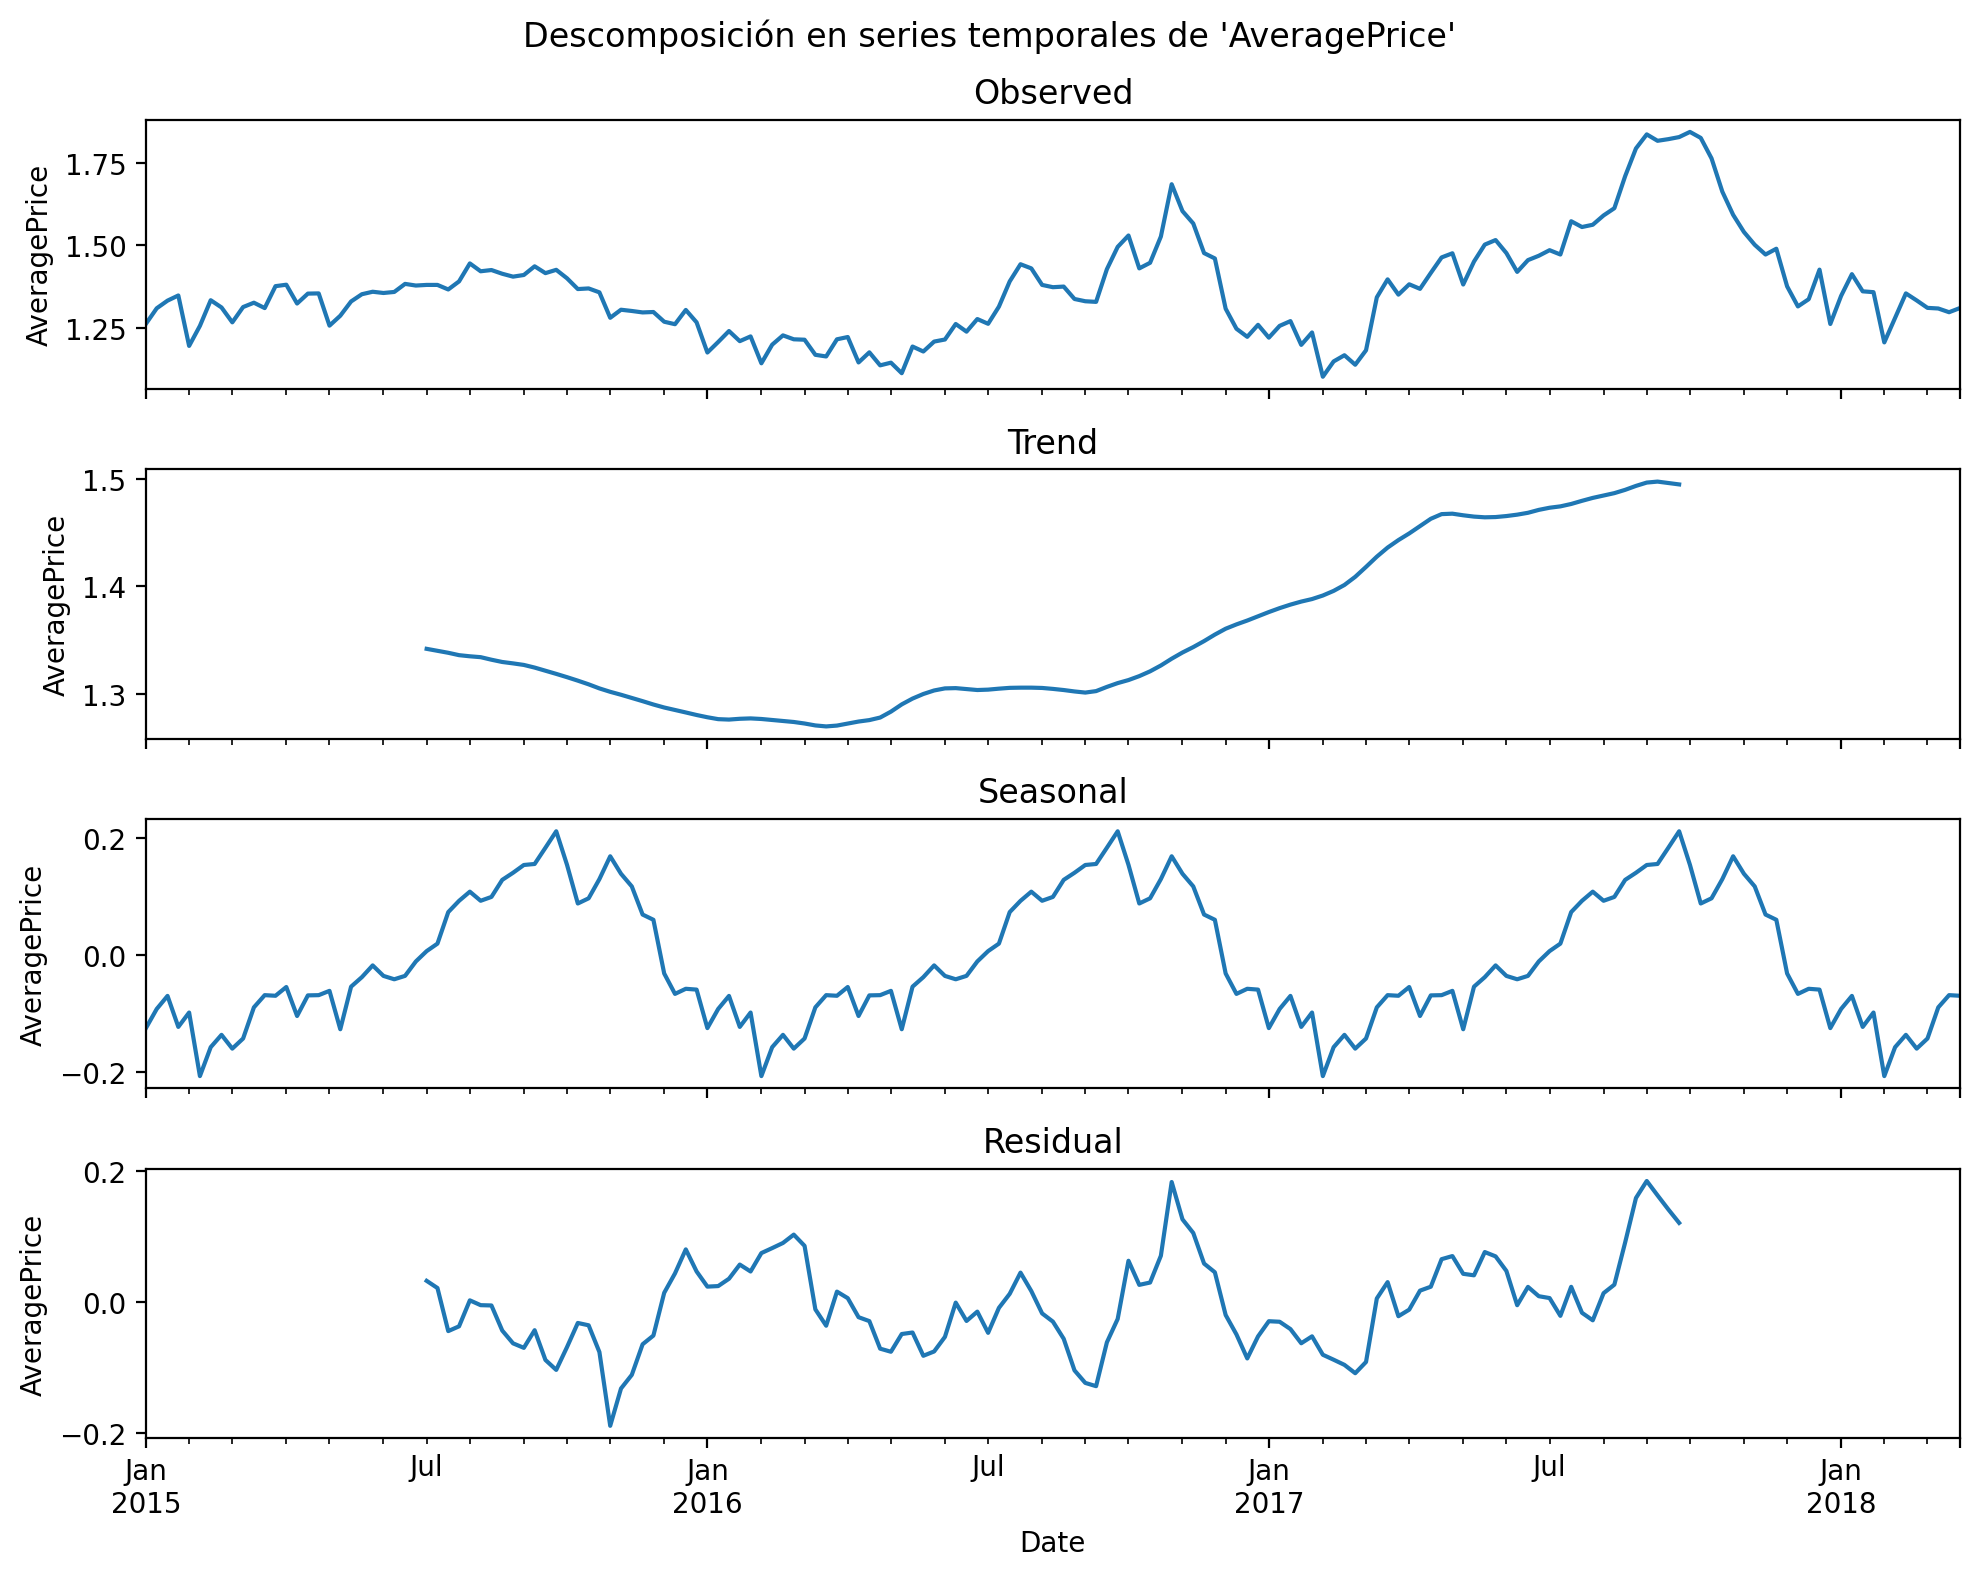

In [49]:
# Dibuja los componentes de la descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Descomposición en series temporales de \'AveragePrice\'')
decomposition.observed.plot(ax=ax1, title='Observed', ylabel='AveragePrice')
decomposition.trend.plot(ax=ax2, title='Trend', ylabel='AveragePrice')
decomposition.seasonal.plot(ax=ax3, title='Seasonal', ylabel='AveragePrice')
decomposition.resid.plot(ax=ax4, title='Residual', ylabel='AveragePrice')

plt.tight_layout()
plt.show()

Se puede ver que anualmente se repite una bajada en el AveragePrice en el mes de Febrero así como un pico de subida en los meses de Octubre y Noviembre.
En septiembre se empieza a acabar la temporada de cosecha del aguacate, y por eso puede subir el precio en Octubre y Noviembre, si le sumamos también que en Noviembre hay el día de Acción de Gracias donde es muy común el uso del aguacate para hacer Guacamole en USA.
En invierno, hay mucha exportación de aguacates de México cosa que ayuda a mantener los precios bajos.

#### 2. **Análisis de Estacionalidad por Región:**

   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.

In [50]:
# Definir las columnas que nos van a interesar para que el set de datos de trabajo sea más pequeño
subset = ['region','Date','AveragePrice']


In [51]:
# Group data by Region and Date to study price evolution
gd_meanprice_evo = greater_regions[subset].groupby(['region','Date']).mean().reset_index()
gd_meanprice_evo

,region,Date,AveragePrice
0,California,2015-01-04,1.085
1,California,2015-01-11,1.010
2,California,2015-01-18,1.130
3,California,2015-01-25,1.180
4,California,2015-02-01,0.980
...,...,...,...
1347,West,2018-02-25,1.230
1348,West,2018-03-04,1.210
1349,West,2018-03-11,1.315
1350,West,2018-03-18,1.360


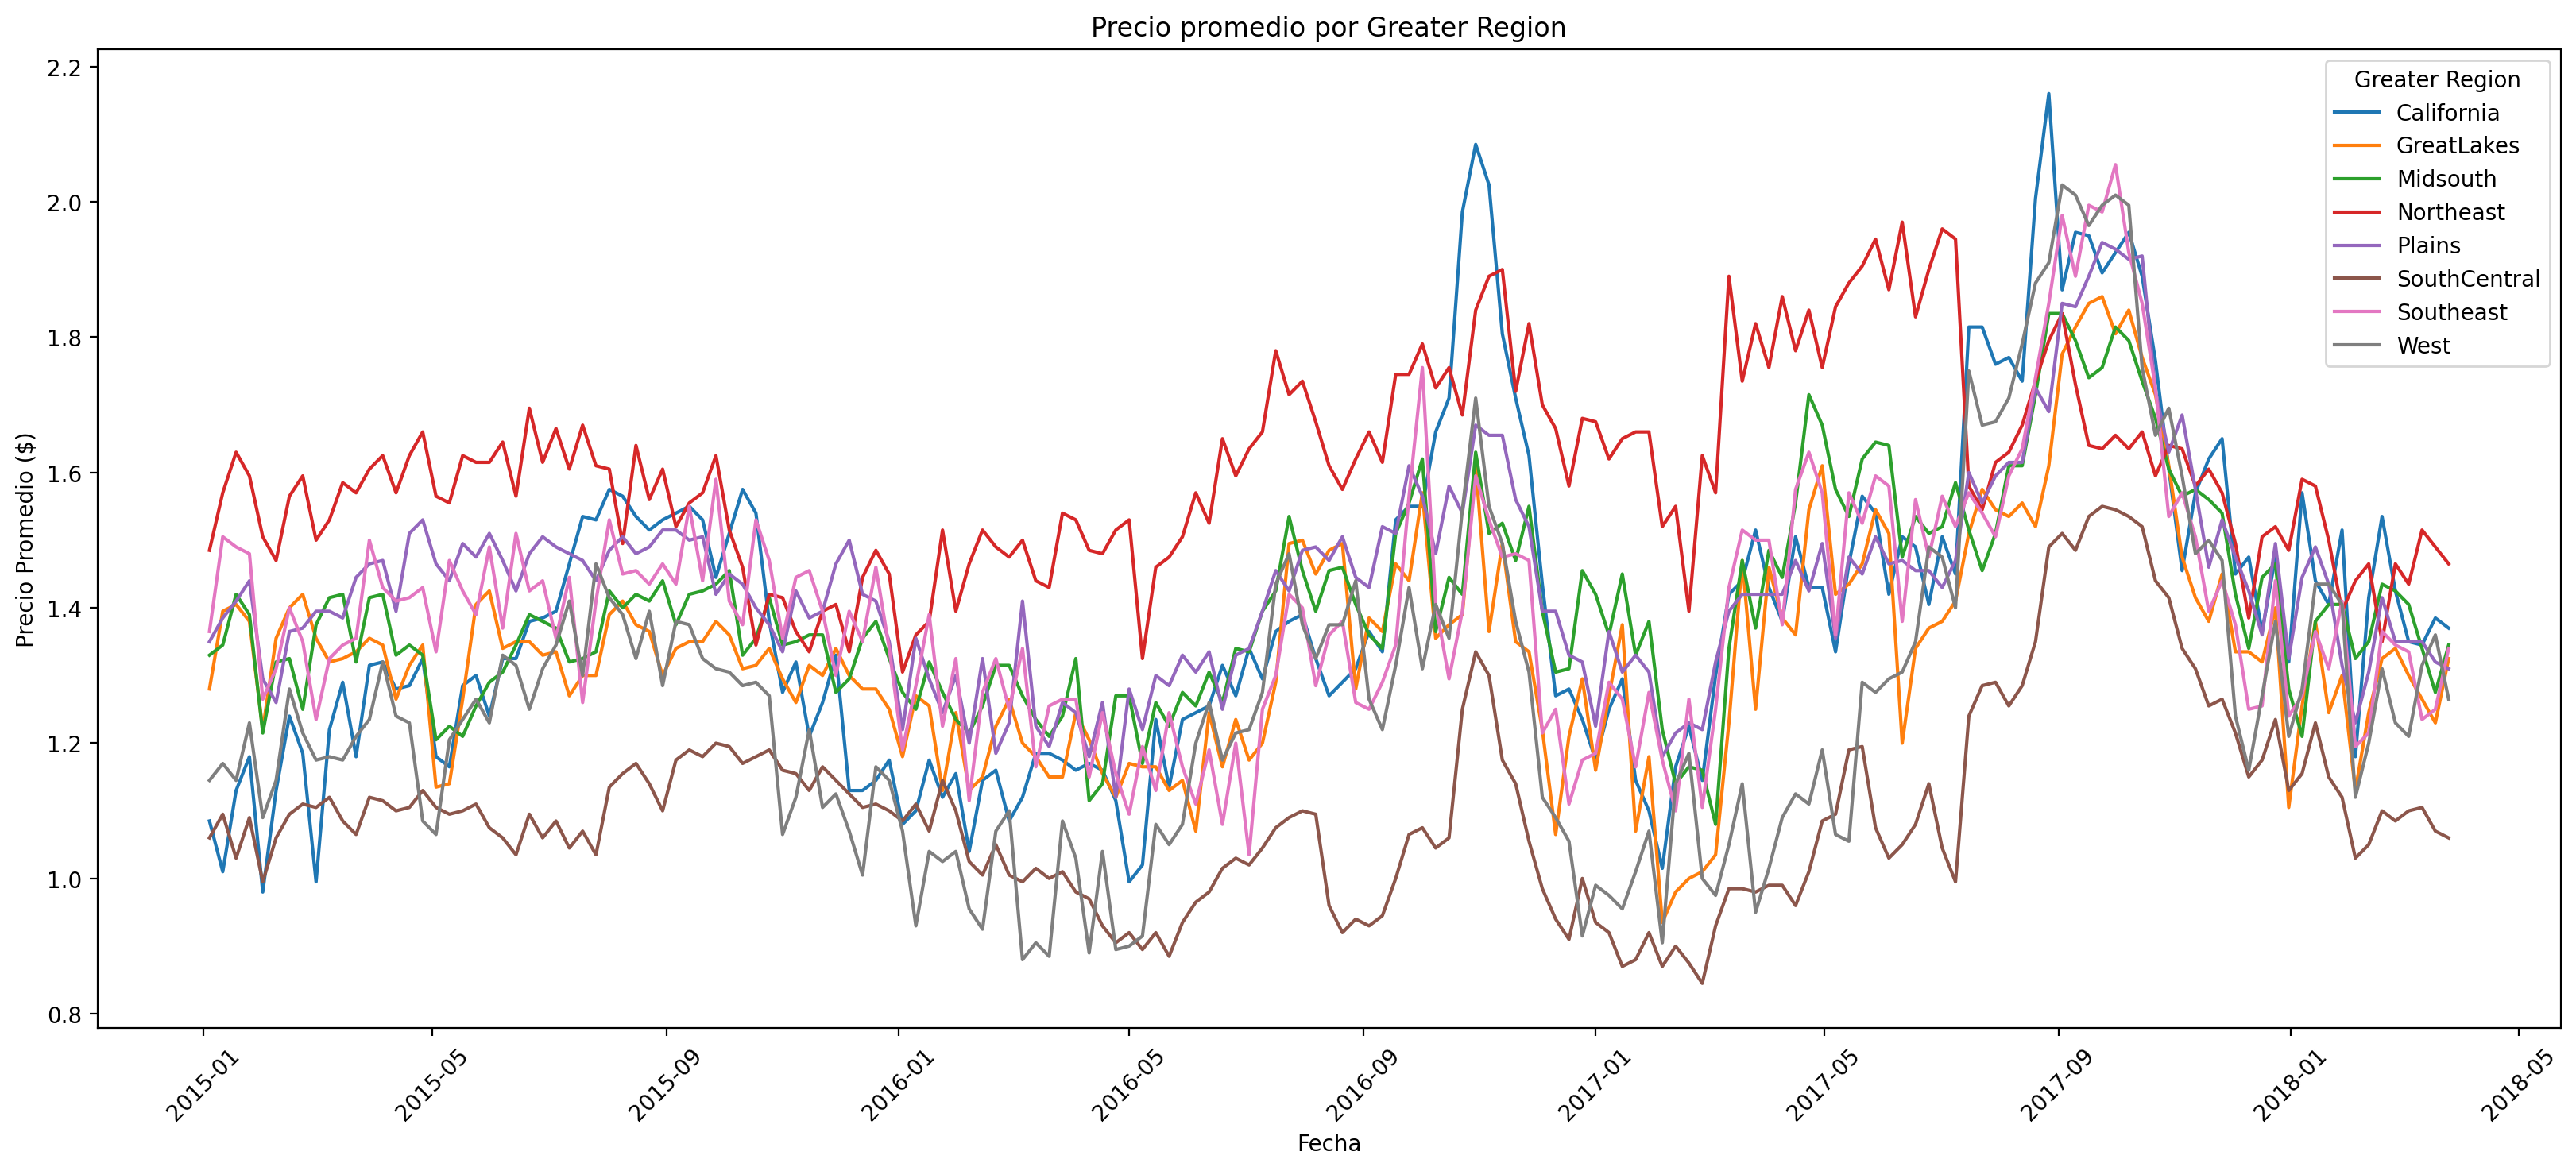

In [52]:
# Gráfica
plt.figure(figsize=(20, 8))
for region in gd_meanprice_evo['region'].unique():
    df_region = gd_meanprice_evo[gd_meanprice_evo['region'] == region]
    plt.plot(df_region['Date'], df_region['AveragePrice'], label=region)
plt.title('Precio promedio por Greater Region')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio ($)')
plt.xticks(rotation=45)
plt.legend(title='Greater Region')
plt.show()

#### 3. **Comparación de Precios Promedio Mensuales:**

   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.


In [53]:
# Group data by Month's end to study price evolution monthly
gd_month = greater_regions[subset].groupby(pd.Grouper(key="Date", freq="ME"))['AveragePrice'].mean()
gd_month

Date
2015-01-31    1.313125
2015-02-28    1.274375
2015-03-31    1.318500
2015-04-30    1.353125
2015-05-31    1.317000
2015-06-30    1.368906
2015-07-31    1.379219
2015-08-31    1.422000
2015-09-30    1.421875
2015-10-31    1.373594
2015-11-30    1.296375
2015-12-31    1.275313
2016-01-31    1.211625
2016-02-29    1.196406
2016-03-31    1.190625
2016-04-30    1.170313
2016-05-31    1.167875
2016-06-30    1.248125
2016-07-31    1.368000
2016-08-31    1.366406
2016-09-30    1.395469
2016-10-31    1.523375
2016-11-30    1.526250
2016-12-31    1.259531
2017-01-31    1.236500
2017-02-28    1.139375
2017-03-31    1.318125
2017-04-30    1.421000
2017-05-31    1.462344
2017-06-30    1.454687
2017-07-31    1.529250
2017-08-31    1.675781
2017-09-30    1.824531
2017-10-31    1.736625
2017-11-30    1.500625
2017-12-31    1.343125
2018-01-31    1.369531
2018-02-28    1.293594
2018-03-31    1.306719
Freq: ME, Name: AveragePrice, dtype: float64

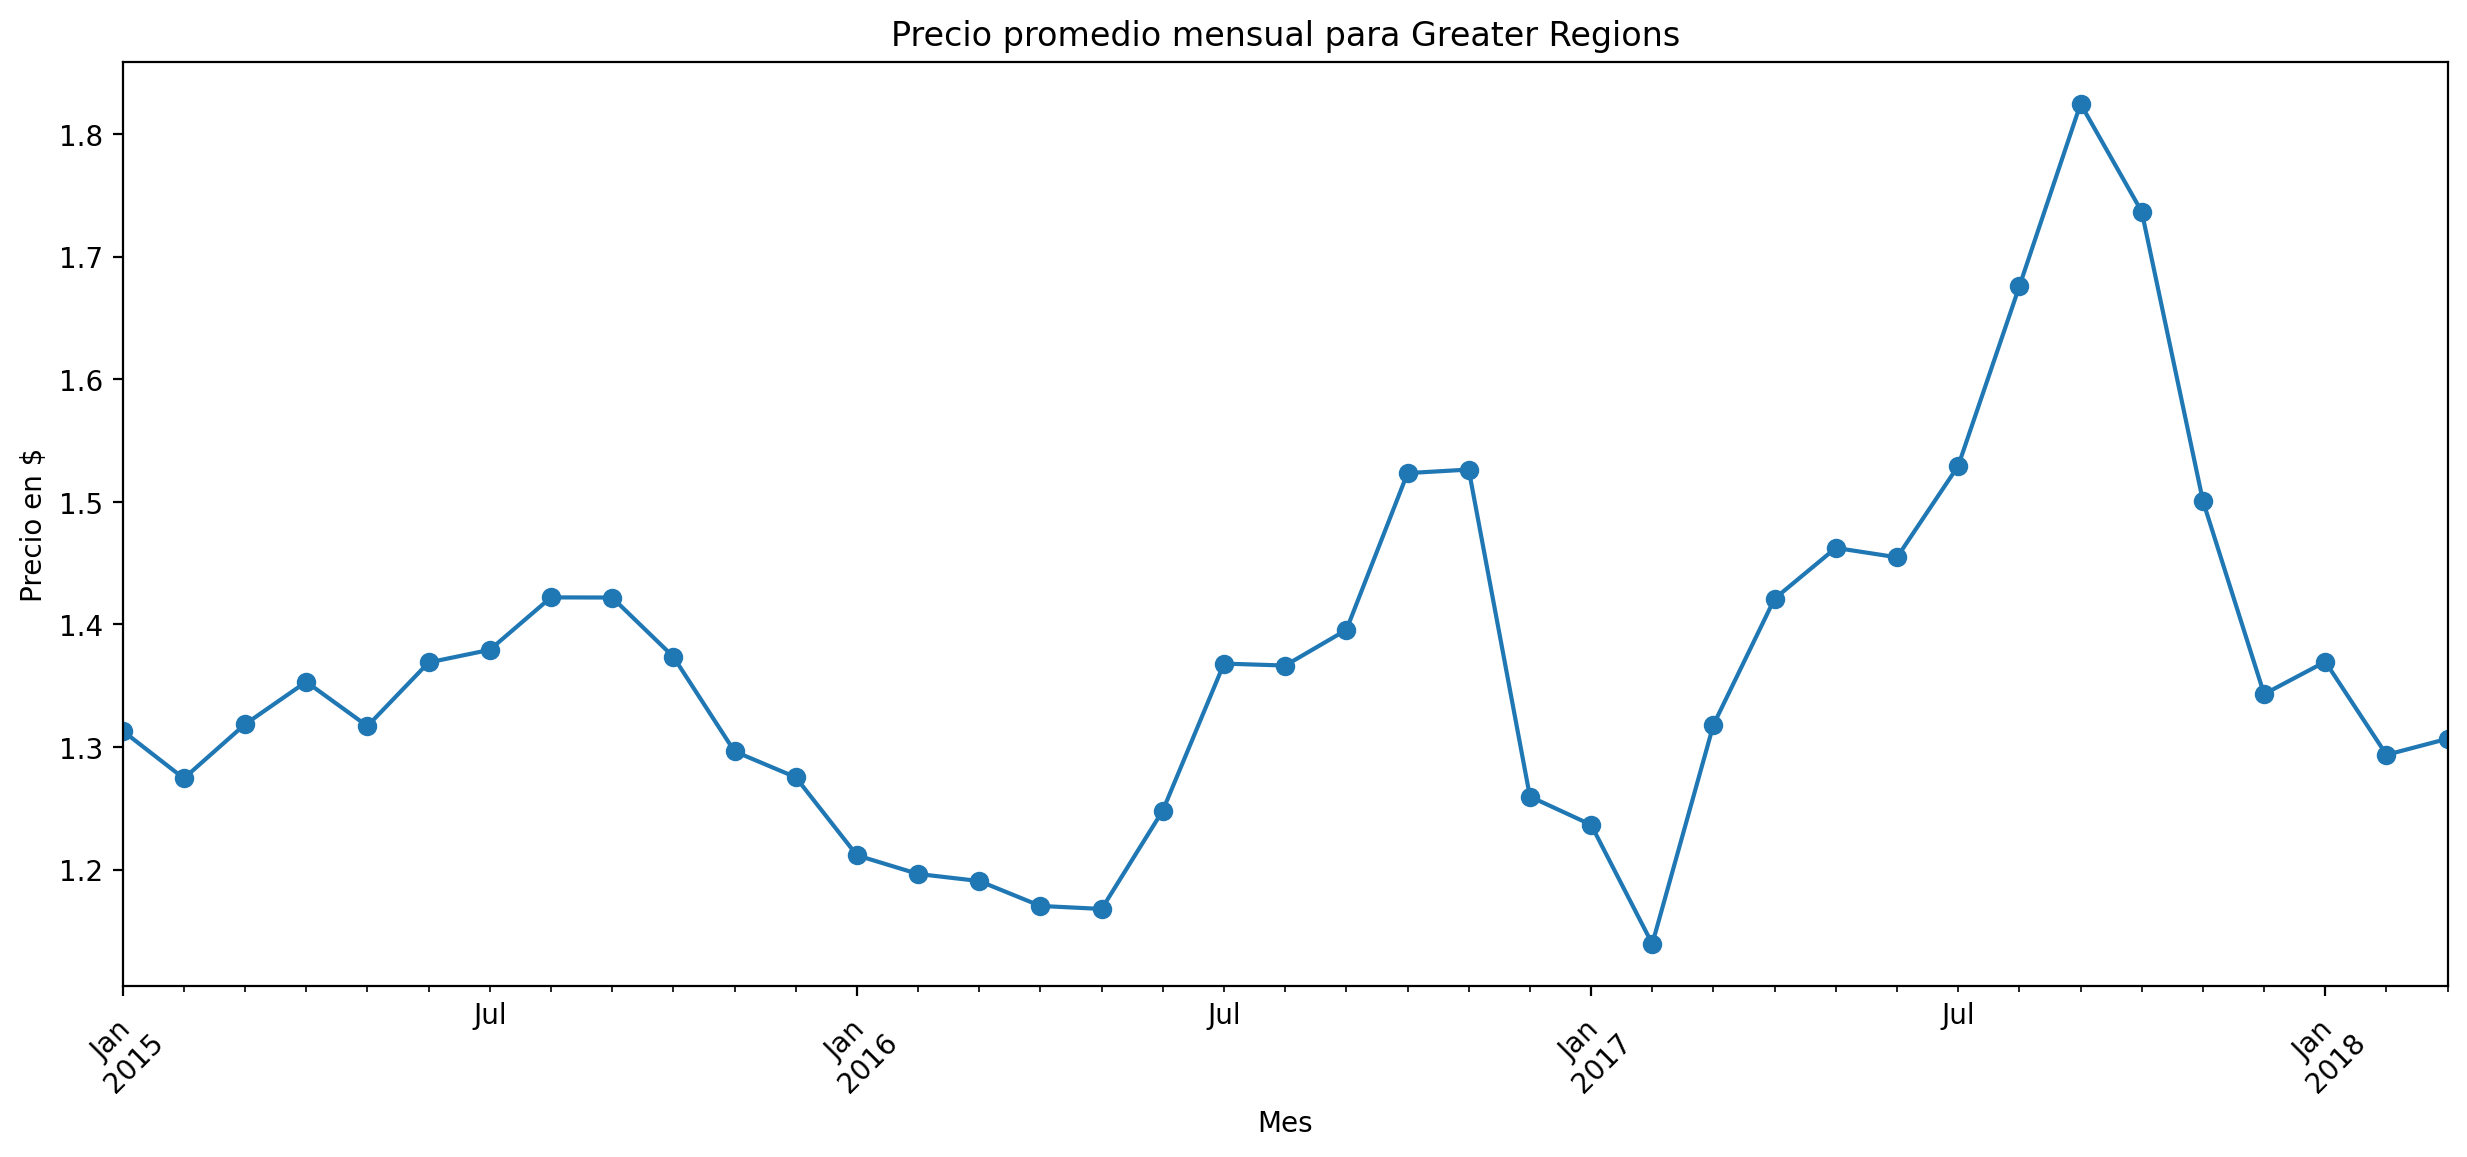

In [54]:
plt.figure(figsize=(15,6))
gd_month.plot(marker='o')
plt.title('Precio promedio mensual para Greater Regions')
plt.xlabel('Mes')
plt.ylabel('Precio en $')
plt.xticks(rotation=45)
plt.show()


Parce que en 2017 se incrementó visiblemente el precio y esto podría deberse no sólo al aumento de popularidad del aguacate como alimento saludable sinó también por los temporales que hubo durante julio y agosto tanto en México como USA (incluido el Huracán Harvey) que devastaron varias zonas de producción de aguacate y comportaron pérdidas ecónomicas importantes, cosa que afectó a la oferta disponible tanto nacional como de exportación.

#### 4. **Tendencia de Ventas a lo Largo del Tiempo:**

   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.


In [55]:
gd_volume = greater_regions[['Date','Total Volume']].groupby('Date').sum()
gd_volume

,Total Volume
Date,
2015-01-04,31937187.96
2015-01-11,29733071.61
2015-01-18,29756578.88
2015-01-25,29026679.68
2015-02-01,45396358.46
...,...
2018-02-25,41481381.40
2018-03-04,42375644.76
2018-03-11,42113837.87


<Figure size 1500x600 with 0 Axes>

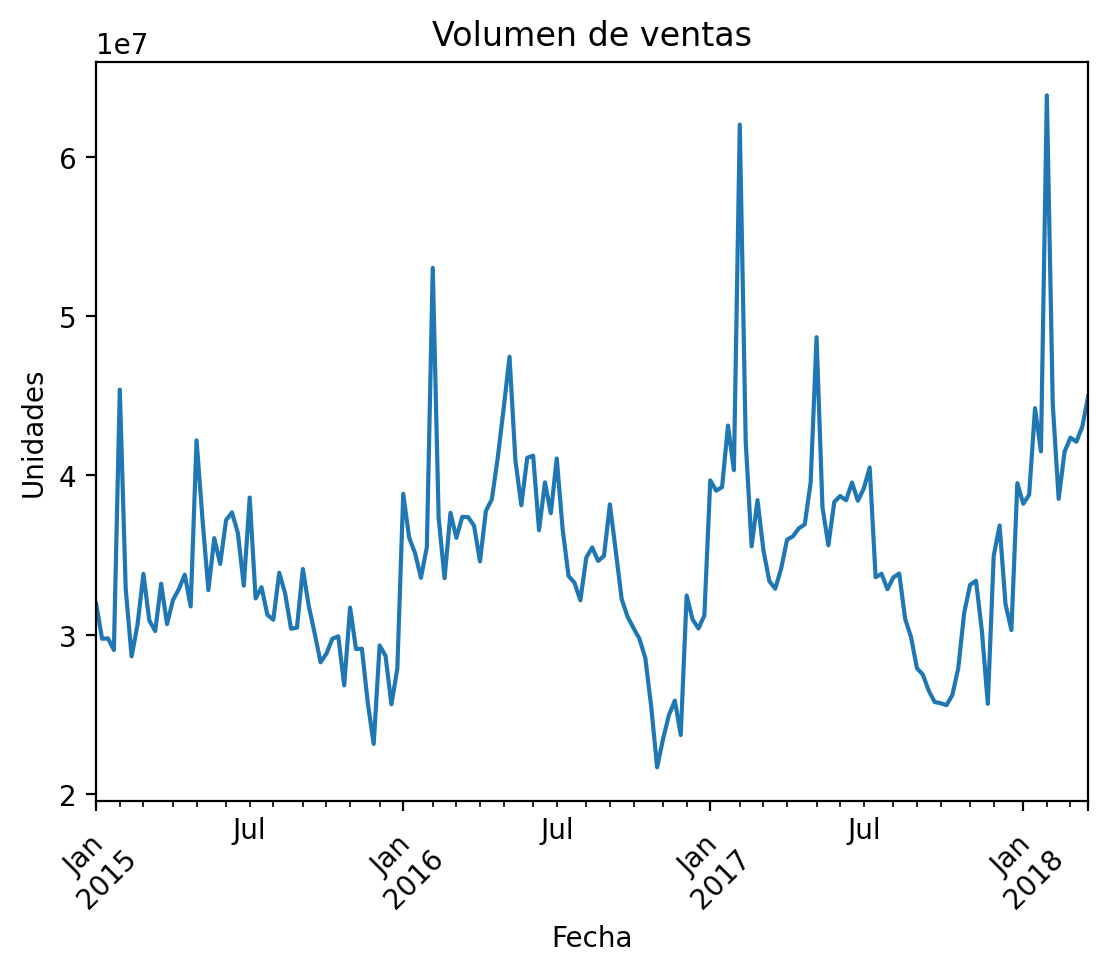

In [56]:
plt.figure(figsize=(15,6))
gd_volume.plot()
plt.title('Volumen de ventas')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.xticks(rotation=45)
plt.legend().remove()
plt.show()

#### 5. **Análisis de Cambios en Precios Anuales:**

   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.


In [57]:
gd_price_yearly = greater_regions[['AveragePrice','year','region']].groupby(['year','region']).mean().unstack()
gd_price_yearly

AveragePrice                                                        \
region   California GreatLakes  Midsouth Northeast    Plains SouthCentral   
year                                                                        
2015       1.315865   1.326250  1.351346  1.543750  1.437885     1.112019   
2016       1.329904   1.277019  1.350865  1.595673  1.377500     1.026923   
2017       1.533868   1.424623  1.520566  1.694057  1.510472     1.162830   
2018       1.411250   1.278333  1.358333  1.474167  1.359583     1.104583   

                            
region Southeast      West  
year                        
2015    1.414712  1.237788  
2016    1.286923  1.180865  
2017    1.512170  1.390000  
2018    1.302917  1.297083

<Figure size 2000x800 with 0 Axes>

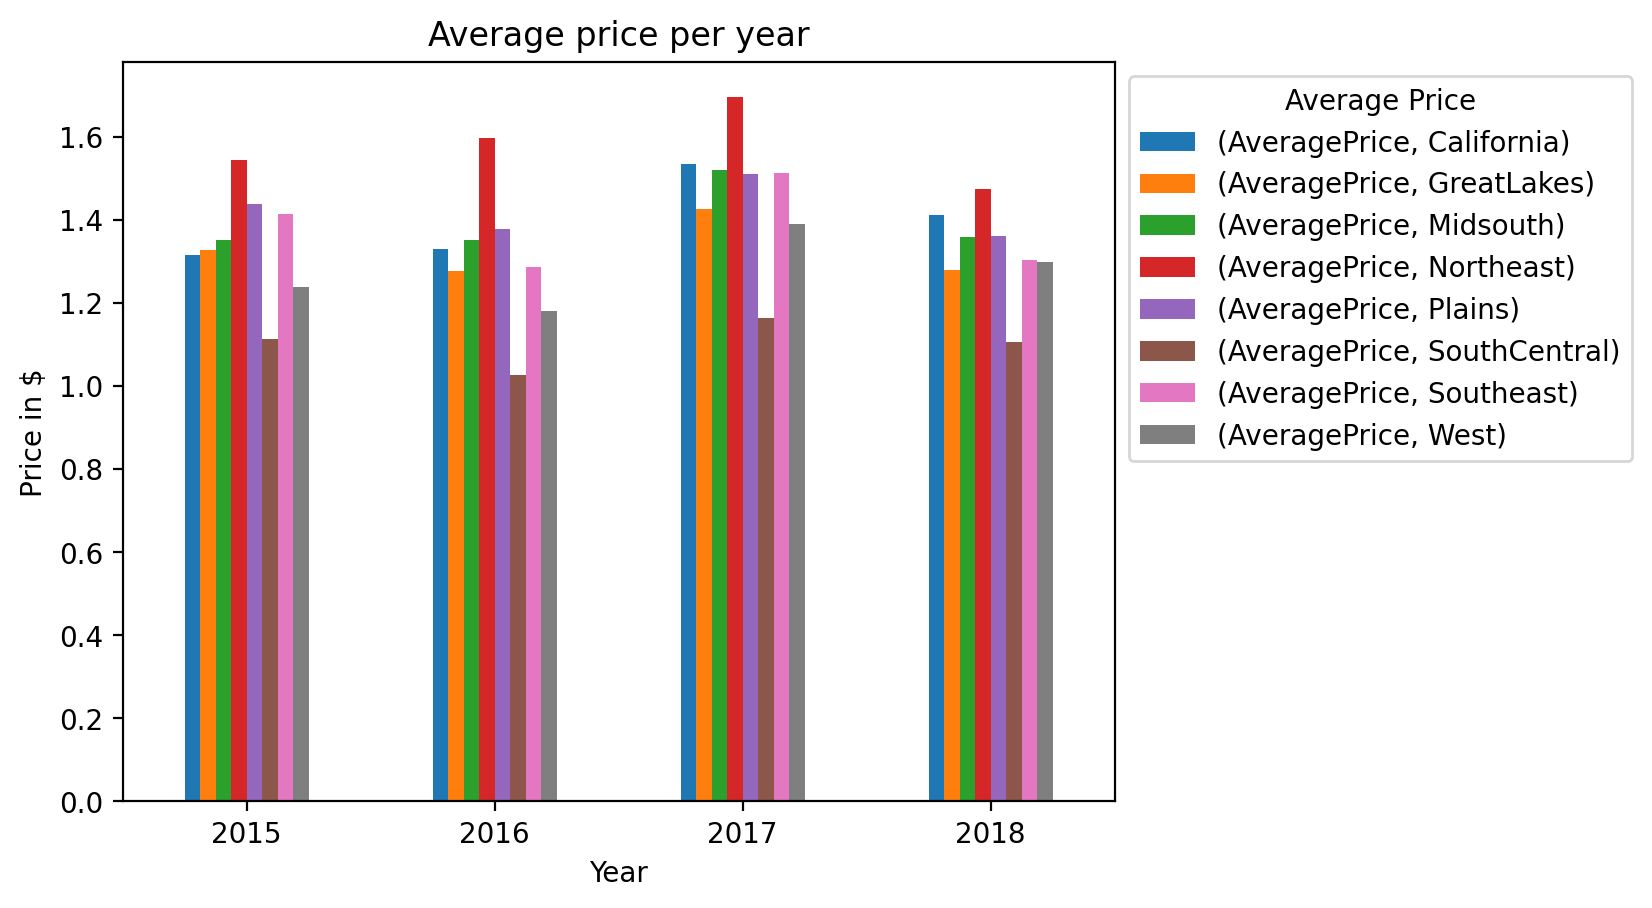

In [60]:
plt.figure(figsize=(20,8))
gd_price_yearly.plot(kind="bar", legend=False)
plt.xticks(rotation=0)
plt.title("Average price per year")
plt.xlabel("Year")
plt.ylabel("Price in $")

# Colocar la leyenda en el lado derecho fuera del gráfico
plt.legend(title='Average Price', loc='upper left', bbox_to_anchor=(1, 1))